In [1]:
print('Importing packages...')
import os
import pandas
import numpy as np
import time
#import zipfile
import geopandas
from matplotlib import pyplot as plt

pandas.set_option('display.max_colwidth', -1)
debug = 1
current_year = 2017
# Directories to look in
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
data_dir = '/home/idies/workspace/Temporary/raddick/cra_scratch_final/'
jobs_dir = data_dir + 'lodes_wac/'
census_dir = data_dir + 'acs5/'
output_data_dir = thisdir + 'final_data/'

census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'
#shapefile_dir = census_shapefile_tiger_basedir + '{0:.0f}/TRACT/'.format(thisyear)

#baltimore_dir = thisdir + 'baltimore/'

code_lookup_dir = thisdir + 'code_guide_lookups/'
inflation_dir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/inflation/'
extrasdir = '/home/idies/workspace/Storage/raddick/census/extras/'

city_data_dir = thisdir + 'city_data/'
scale = 0.25
g = 0 # global time

os.chdir(thisdir)
print('Now in directory: {0:}'.format(os.getcwd()))
print('ok')

Importing packages...
Now in directory: /home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act
ok


In [2]:
s = time.time()
city = 'Baltimore'

if (city == 'Baltimore'):
    thestate = 24
    state_abbrev = 'md'
    citycode = 4000
    baltimore_shapefile_dir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
    plotlimits = {'N': 39.5, 'S': 39, 'E': -76, 'W': -77}

elif (city == 'Washington DC'):
    thestate = 11   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'dc'
    citycode = 50000
    plotlimits = {'N': 39.01, 'S': 38.79, 'E': -76.9, 'W': -77.13}

elif (city == 'Detroit'):
    thestate = 26   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'mi'
    citycode = 22000

elif (city == 'Newark'):
    thestate = 34
    state_abbrev = 'nj'
    citycode = 51000
    
#elif (city == 'St. Louis'):
#    thestate = 29   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
#    state_abbrev = 'mo'
#    thecounty = 510
#    cityname_file = 'st_louis'
    
#elif (city == 'Richmond'):
#    thestate = 51   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
#    state_abbrev = 'va'
#    thecounty = 760
#    cityname_file = 'richmond'
    
#elif (city == 'San Francisco'):
#    thestate = 6   # state_codes_df[state_codes_df['STATE_NAME'] == 'California']
#    state_abbrev = 'ca'
#    thecounty = 75
#    cityname_file = 'san_francisco'
    
#elif (city == 'Philadelphia'):
#    thestate = 42
#    state_abbrev = 'pa'
#    thecounty = 101
#    cityname_file = 'philadelphia'

elif (city == 'Cleveland'):
    thestate = 39
    state_abbrev = 'oh'
    citycode = 16000
    plotlimits = {'N': 41.65, 'S': 41.35, 'E': -81.5, 'W': -81.9}

else:
    print('ERROR: Select city from list!')

cityname_file = city.lower().replace(' ','_')
e = time.time()
g = g + (e-s)
print('Selected {0:}!'.format(city))

Selected Baltimore!


# Identify tracts that belong to the city

## Do city borders line up with census tracts (in 2017)?

Parsing 2017 census tracts...
   overlaying city on state census tract geometries...


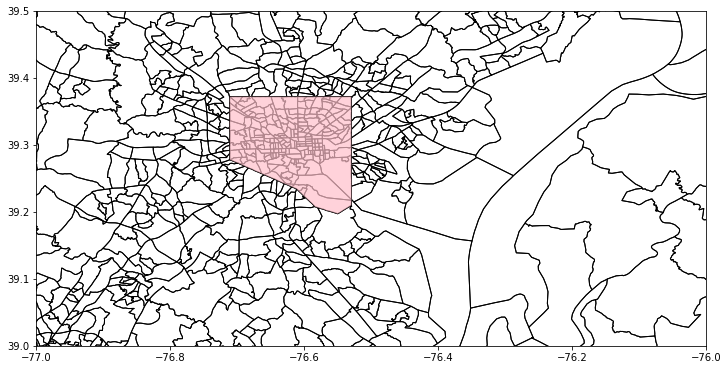

In [3]:
s = time.time()
#years = np.arange(current_year, 2010, -1)
city_tracts_years_gdf = geopandas.GeoDataFrame()
years = np.arange(2017, 2016, -1)
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
    
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})

fig, ax = plt.subplots(1,1, figsize=(12,12))
state_tracts_gdf.plot(ax=ax, color='none', edgecolor='black')
year_city_geo_gdf.plot(ax=ax, color='pink', alpha=0.7)
#plotlimits = {'N': 39.01, 'S': 38.79, 'E': -76.9, 'W': -77.13}
plt.xlim([plotlimits['W'], plotlimits['E']])
plt.ylim([plotlimits['S'], plotlimits['N']])
plt.show()




## Get city census tracts for each year

In [4]:
s = time.time()
years = np.arange(current_year, 2010, -1)
city_tracts_years_gdf = geopandas.GeoDataFrame()
for thisyear in years:
    print('Parsing {0:.0f} census tracts...'.format(thisyear))
    state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
    state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('   overlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode)]
    
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})

    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf, year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    #year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)

    print('    removing boundary tracts that had only tiny overlaps...')
    year_city_tracts_gdf = year_city_tracts_gdf[year_city_tracts_gdf.geometry.area >= 1e-10]    

    city_tracts_years_gdf = city_tracts_years_gdf.append(year_city_tracts_gdf)

print('converting columns and setting index...')
city_tracts_years_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_years_gdf['COUNTYFP'], errors='coerce')
city_tracts_years_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_years_gdf['NAME'], errors='coerce')
#city_tracts_years_gdf.loc[:, 'census_tract'] = pandas.to_numeric(city_tracts_years_gdf['census_tract'], errors='coerce')
city_tracts_years_gdf.crs = state_tracts_gdf.crs

need_counties_list = city_tracts_years_gdf['COUNTYFP'].drop_duplicates().tolist()
need_tracts_list = city_tracts_years_gdf['NAME'].drop_duplicates().tolist()

city_tracts_years_gdf = city_tracts_years_gdf.set_index(['COUNTYFP', 'NAME', 'year'])
city_tracts_years_gdf = city_tracts_years_gdf.sort_index()

e = time.time()
g = g + (e-s)
print('Read {0:,.0f} tract-years in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_tracts_years_gdf), np.floor((e-s)/60), (e-s)%60))

city_tracts_years_gdf.columns.tolist()

Parsing 2017 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2016 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2015 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2014 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2013 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2012 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only tiny overlaps...
Parsing 2011 census tracts...
   overlaying city on state census tract geometries...
    removing boundary tracts that had only ti

['STATEFP',
 'TRACTCE',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'city_name',
 'geometry']

## Ensure that the tract boundaries remain constant across all years

In [5]:
#city_tracts_years_gdf.reset_index()[city_tracts_years_gdf.reset_index()['year'] == 2017].plot()
s = time.time()
counties_list = city_tracts_years_gdf.index.get_level_values('COUNTYFP').drop_duplicates().tolist()

print('{0:} covers {1:,.0f} county...'.format(city, len(counties_list)))

for x in counties_list:
    print('County {0:,.0f} contains {1:,.0f} tract-years:'.format(x, len(city_tracts_years_gdf.reset_index()[city_tracts_years_gdf.reset_index()['COUNTYFP'] == x])))
    for i in years:
        print('{0:.0f}: {1:,.0f} tracts'.format(
            i, 
            len(city_tracts_years_gdf.reset_index()[
                (city_tracts_years_gdf.reset_index()['COUNTYFP'] == x) 
                & (city_tracts_years_gdf.reset_index()['year'] == i)])
        ))
        census_tracts_2017_list = city_tracts_years_gdf.xs(2017, level=-1).reset_index()[
            city_tracts_years_gdf.xs(2017, level=-1).reset_index()['COUNTYFP'] == x].set_index('NAME').index.values.tolist()

        county_x_year_i_census_tracts_list = city_tracts_years_gdf.reset_index()[
                (city_tracts_years_gdf.reset_index()['COUNTYFP'] == x) 
                & (city_tracts_years_gdf.reset_index()['year'] == i)
        ]['NAME'].tolist()
        
        new_census_tracts = []
        missing_census_tracts = []
        
        for n in county_x_year_i_census_tracts_list:
            if (n not in census_tracts_2017_list):
                new_census_tracts.append(n)
            for p in census_tracts_2017_list:
                if (p not in county_x_year_i_census_tracts_list):
                    missing_census_tracts.append(n)
        for y in new_census_tracts:
            print('Found census tract in {0:.0f} that is not present in 2017: {1:}'.format(i,y))
        for z in missing_census_tracts:
            print('Found census tract from 2017 that was not present in {0:.0f}: {1:}'.format(i,z))
        if (len(new_census_tracts) + len(missing_census_tracts) > 0):
            print('\n')

#fig, ax = plt.subplots(1,1, figsize=(48*scale, 48*scale))
#city_tracts_years_gdf.xs(2012, level=-1).plot(ax=ax, color='blue', edgecolor='white')
##city_tracts_years_gdf.loc[[2012, 35, 1711.03]].geometry.plot()#.plot(color='red')
#for ix, thisrow in city_tracts_years_gdf.xs(2012, level=-1).iterrows():
#    if (ix[1] in new_census_tracts):
#        annotator = ix[1]
#        ax.annotate(annotator, 
#                    xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
#                    xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
#                            thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
#                    backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
#                    fontsize=24*scale)
#plt.show()

e = time.time()
g = g + (e-s)
print('Checked consistency of {0:,.0f} tract-years in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_tracts_years_gdf), np.floor((e-s)/60), (e-s)%60))
            

Baltimore covers 1 county...
County 510 contains 1,400 tract-years:
2017: 200 tracts
2016: 200 tracts
2015: 200 tracts
2014: 200 tracts
2013: 200 tracts
2012: 200 tracts
2011: 200 tracts
Checked consistency of 1,400 tract-years in 0 minutes 1 seconds!


# Get geo-aggregated loans by census tract and year

In [6]:
s = time.time()
print('reading nationwide data...')
agg_loans_nationwide_df = pandas.read_csv(data_dir+'agg_loans.csv', encoding='utf-8', low_memory=False, index_col='rownumber')
print('Read {0:,.0f} nationwide tract-years...'.format(len(agg_loans_nationwide_df), e-s))

#print('selecting originated business loans since 2011 in {0:}...'.format(city))
# Keep only business loans
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['loan_type'] == 4]
# Keep only loan originations
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['action_taken_type'] == 1]
# Keep only this state
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['state'] == thestate]

print('getting city data...')
city_loans_df = pandas.DataFrame()
for oneyear in years:
    #print('{0:.0f}: found {1:,.0f} originated business loans nationwide...'.format(oneyear, len(agg_loans_nationwide_df[agg_loans_nationwide_df['activity_year'] == oneyear])))
    for onecounty in need_counties_list:
        for onetract in need_tracts_list:
            city_loans_df = city_loans_df.append(agg_loans_nationwide_df[(agg_loans_nationwide_df['activity_year'] == oneyear) & (agg_loans_nationwide_df['county'] == onecounty) & (agg_loans_nationwide_df['census_tract'] == onetract)])            

city_loans_df = city_loans_df.set_index(['activity_year', 'county', 'census_tract'])
e = time.time()
g = g + (e-s)

print('Found {0:,.0f} tract-years with business loans originated in {1:} in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(city_loans_df), city, np.floor((e-s)/60), (e-s)%60))


reading nationwide data...


/home/idies/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Read 2,645,400 nationwide tract-years...
getting city data...
Found 1,381 tract-years with business loans originated in Baltimore in 0 minutes 24 seconds!


## Merge loan data into tract data

In [7]:
s = time.time()
data_gdf = city_tracts_years_gdf.reset_index().merge(city_loans_df.reset_index(), how='left', 
                                       left_on=['COUNTYFP', 'NAME', 'year'], 
                                        right_on=['county', 'census_tract', 'activity_year'],
                                        suffixes=('_tracts', '_loans')).set_index(['COUNTYFP', 'NAME', 'year'])



#data_gdf.columns#[data_gdf['amtLoans1'].isnull()]
numeric_columns = []
numeric_columns += ['nLoans1', 'amtLoans1', 'nLoans100k', 'amtLoans100k']
numeric_columns += ['nLoans250k', 'amtLoans250k', 'nLoansToSmallest', 'amtLoansToSmallest']

for thiscol in numeric_columns:
    data_gdf.loc[:, thiscol] = data_gdf[thiscol].fillna(0)
e = time.time()
g = g + (e-s)
print('Added loan data for {0:,.0f} tract-years in {1:,.0f} seconds.'.format(len(data_gdf), e-s))

Added loan data for 1,400 tract-years in 0 seconds.


## Add income groups, CRA levels, loan totals for each tract-year

In [8]:
s = time.time()

print('looking up income group names from income_group_total...')

data_gdf = data_gdf.rename(columns = {'income_group_total': 'income_group_code'})
data_gdf = data_gdf.assign(income_group = np.nan)

data_gdf.loc[data_gdf['income_group_code'] == 1, 'income_group'] = '< 10% of Median Family Income (MFI)'
data_gdf.loc[data_gdf['income_group_code'] == 2, 'income_group'] = '10% to 20% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 3, 'income_group'] = '20% to 30% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 4, 'income_group'] = '30% to 40% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 5, 'income_group'] = '40% to 50% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 6, 'income_group'] = '50% to 60% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 7, 'income_group'] = '60% to 70% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 8, 'income_group'] = '70% to 80% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 9, 'income_group'] = '80% to 90% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 10, 'income_group'] = '90% to 100% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 11, 'income_group'] = '100% to 110% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 12, 'income_group'] = '110% to 120% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 13, 'income_group'] = '> 120% of MFI'

print('Adding CRA income levels (low/moderate/middle/upper/unknown)...')
# Get levels (low, moderate, middle, upper)
data_gdf = data_gdf.assign(cra_level = np.nan)
data_gdf.loc[(data_gdf['income_group_code'] >= 1) & (data_gdf['income_group_code'] <= 5), 'cra_level'] = 'low'
data_gdf.loc[(data_gdf['income_group_code'] >= 6) & (data_gdf['income_group_code'] <= 8), 'cra_level'] = 'moderate'
data_gdf.loc[(data_gdf['income_group_code'] >= 9) & (data_gdf['income_group_code'] <= 12), 'cra_level'] = 'middle'
data_gdf.loc[(data_gdf['income_group_code'] == 13), 'cra_level'] = 'upper'
data_gdf.loc[(data_gdf['income_group_code'] == 14), 'cra_level'] = 'unknown'

print('Getting CRA income levels for tracts where only CRA level was reported...')
data_gdf.loc[data_gdf['income_group_code'] == 101, 'cra_level'] = 'low'
data_gdf.loc[data_gdf['income_group_code'] == 102, 'cra_level'] = 'moderate'
data_gdf.loc[data_gdf['income_group_code'] == 103, 'cra_level'] = 'middle'
data_gdf.loc[data_gdf['income_group_code'] == 104, 'cra_level'] = 'upper'
data_gdf.loc[data_gdf['income_group_code'] == 105, 'cra_level'] = 'unknown'


print('calculating total loans...')
data_gdf = data_gdf.assign(nLoans = data_gdf['nLoans1'] + data_gdf['nLoans100k'] + data_gdf['nLoans250k'])
data_gdf = data_gdf.assign(amtLoans = data_gdf['amtLoans1'] + data_gdf['amtLoans100k'] + data_gdf['amtLoans250k'])

print('calculating working loans...')
data_gdf = data_gdf.assign(avgSmallLoan = data_gdf['amtLoans1'] / data_gdf['nLoans1'])

data_gdf = data_gdf.assign(nWorkingLoans = 0)
data_gdf.loc[data_gdf['avgSmallLoan'] < 10000, 
                           'nWorkingLoans'] = data_gdf['nLoans'][data_gdf['avgSmallLoan'] < 10000] - data_gdf['nLoans1'][data_gdf['avgSmallLoan'] < 10000]
data_gdf.loc[data_gdf['avgSmallLoan'] >= 10000, 
                           'nWorkingLoans'] = data_gdf['nLoans'][data_gdf['avgSmallLoan'] >= 10000]

data_gdf = data_gdf.assign(amtWorkingLoans = 0)
data_gdf.loc[data_gdf['avgSmallLoan'] < 10000, 
                           'amtWorkingLoans'] = data_gdf['amtLoans'][data_gdf['avgSmallLoan'] < 10000] - data_gdf['amtLoans1'][data_gdf['avgSmallLoan'] < 10000]
data_gdf.loc[data_gdf['avgSmallLoan'] >= 10000, 
                           'amtWorkingLoans'] = data_gdf['amtLoans'][data_gdf['avgSmallLoan'] >= 10000]

e = time.time()
g = g + (e-s)

print('Kept {0:,.0f} tract-years in {1:} in {2:,.2f} seconds!'.format(len(data_gdf), city, e-s))
data_gdf.groupby('cra_level').size()
data_gdf.head(2)

looking up income group names from income_group_total...
Adding CRA income levels (low/moderate/middle/upper/unknown)...
Getting CRA income levels for tracts where only CRA level was reported...
calculating total loans...
calculating working loans...
Kept 1,400 tract-years in Baltimore in 0.57 seconds!


STATEFP TRACTCE          NAMELSAD  MTFCC FUNCSTAT   ALAND  \
COUNTYFP NAME  year                                                             
510      101.0 2011  24      010100  Census Tract 101  G5020  S        393197   
               2012  24      010100  Census Tract 101  G5020  S        393197   

                     AWATER     INTPTLAT      INTPTLON  city_name  \
COUNTYFP NAME  year                                                 
510      101.0 2011  148387  +39.2787586  -076.5742651  Baltimore   
               2012  148387  +39.2787586  -076.5742651  Baltimore   

                          ...       amtLoans250k  nLoansToSmallest  \
COUNTYFP NAME  year       ...                                        
510      101.0 2011       ...        0.0          43.0               
               2012       ...        1468000.0    28.0               

                     amtLoansToSmallest        income_group  cra_level  \
COUNTYFP NAME  year                                                      
510      101.0 2011  774000.0            90% to 100% of MFI  middle      
               2012  775000.0            90% to 100% of MFI  middle      

                     nLoans   amtLoans  avgSmallLoan nWorkingLoans  \
COUNTYFP NAME  year                                                  
510      101.0 2011  56.0    891000.0   9833.333333   2.0            
               2012  53.0    2181000.0  11918.367347  53.0           

                    amtWorkingLoans  
COUNTYFP NAME  year                  
510      101.0 2011  360000.0        
               2012  2181000.0       

[2 rows x 36 columns]

# Let's connect geographic aggregates to other geographic data

## First, get 2011-2015 jobs data for this state (all block groups)

In [9]:
s = time.time()
writefilename = city_data_dir+'{0:}_jobs_2015.csv'.format(cityname_file)

print('reading state jobs data for {0:}...'.format(state_abbrev.upper()))

if (state_abbrev in ['ca', 'ny', 'fl']):
    statejobfiles = sorted([jobs_dir+x for x in os.listdir(jobs_dir) if '{0:}'.format(state_abbrev) in x and '{0:}.'.format(state_abbrev) not in x])
    #print(statejobfiles)
    city_raw_jobs_df = pandas.DataFrame()
    for thisfile in statejobfiles:
        print('Reading {0:}...'.format(thisfile))
        zdf = pandas.read_csv(thisfile, index_col='rownumber', low_memory=False)
        #print(df['w_geocode'].head(1).apply(lambda x: str(x)[1:4]))
        city_raw_jobs_df = city_raw_jobs_df.append(zdf[zdf['w_geocode'].apply(lambda x: str(x)[1:4] == '{0:03d}'.format(thecounty))])
else:
    state_raw_jobs_df = pandas.read_csv(jobs_dir+'jobs_data_{0:}.csv'.format(state_abbrev), index_col='rownumber')

print('keeping only 2011-2015 jobs...')
state_raw_jobs_df = state_raw_jobs_df[state_raw_jobs_df['year'] >= 2011]


print('Keeping only {0:} counties and census tracts...'.format(city))
if (thestate < 10):
    state_raw_jobs_df = state_raw_jobs_df.assign(county= pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[1:4]), errors='coerce'))
    state_raw_jobs_df = state_raw_jobs_df.assign(census_tract = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[4:8] + '.' + str(x)[8:10]), errors='coerce'))
else:
    state_raw_jobs_df = state_raw_jobs_df.assign(county = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[2:5]), errors='coerce'))
    state_raw_jobs_df = state_raw_jobs_df.assign(census_tract = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[5:9] + '.' + str(x)[9:11]), errors='coerce'))

city_raw_jobs_df = state_raw_jobs_df[
    (state_raw_jobs_df['county'].isin(need_counties_list))
    & (state_raw_jobs_df['census_tract'].isin(need_tracts_list))
]

#print('Writing out 2015 jobs data...')
#city_raw_jobs_df[city_raw_jobs_df['year'] == 2015].to_csv(writefilename)

e = time.time()
g = g + (e-s)

print('Kept {0:,.0f} rows in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_raw_jobs_df), np.floor((e-s)/60), (e-s) % 60))


reading state jobs data for MD...
keeping only 2011-2015 jobs...
Keeping only Baltimore counties and census tracts...
Kept 520,776 rows in 3 minutes 7 seconds!


## Sum jobs over census tracts for city

In [10]:
s = time.time()
sum_columns = []
sum_columns += ['C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03']
sum_columns += ['CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08']
sum_columns += ['CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16']
sum_columns += ['CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02', 'CR03', 'CR04']
sum_columns += ['CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02', 'CD03', 'CD04', 'CS01']
sum_columns += ['CS02', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01', 'CFS02']
sum_columns += ['CFS03', 'CFS04', 'CFS05']

city_jobs_df = city_raw_jobs_df.groupby(['year', 'county', 'census_tract'])[sum_columns].sum()
#state_jobs_df
e = time.time()
g = g + (e-s)
print('ok')

#city_raw_jobs_df.columns#.groupby(['county', 'census_tract']).size()

ok


## Copy 2015 jobs data to 2016 and 2017

In [11]:
s = time.time()
print('setting 2016 and 2017 jobs to 2015 values...')

n16df = pandas.DataFrame(data=None, columns=sum_columns, index=city_jobs_df.xs(2015).index)
for thiscounty in n16df.index.unique(level='county').tolist():
    for thistract in n16df.index.unique(level='census_tract').tolist():
        n16df.loc[(thiscounty, thistract)] = city_jobs_df.xs(2015).loc[(thiscounty, thistract)]
n16df = n16df.assign(year = 2016)
n16df = n16df.reset_index().set_index(['year', 'county', 'census_tract'])

n17df = pandas.DataFrame(data=None, columns=sum_columns, index=city_jobs_df.xs(2015).index)
for thiscounty in n17df.index.unique(level='county').tolist():
    for thistract in n17df.index.unique(level='census_tract').tolist():
        n17df.loc[(thiscounty, thistract)] = city_jobs_df.xs(2015).loc[(thiscounty, thistract)]
n17df = n17df.assign(year = 2017)
n17df = n17df.reset_index().set_index(['year', 'county', 'census_tract'])


city_jobs_df = city_jobs_df.append(n16df)
city_jobs_df = city_jobs_df.append(n17df)
e = time.time()
g = g + (e-s)
print('Done!')

setting 2016 and 2017 jobs to 2015 values...
Done!


## Which jobs columns do we want?

In [12]:
s = time.time()
jobs_metadata_df = pandas.read_csv(code_lookup_dir+'wac_jobs_metadata.csv', encoding='utf-8', index_col='varnum')
jobs_metadata_df = jobs_metadata_df.set_index('variable')

jobs_columns = ['C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03', 'CNS01']
jobs_columns += ['CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08']
jobs_columns += ['CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15']
jobs_columns += ['CNS16', 'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02']
jobs_columns += ['CR03', 'CR04', 'CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02']
jobs_columns += ['CD03', 'CD04', 'CS01', 'CS02', 'CFA01', 'CFA02', 'CFA03']
jobs_columns += ['CFA04', 'CFA05', 'CFS01', 'CFS02', 'CFS03', 'CFS04', 'CFS05']

#for x in baltimore_agg_loans_df[jobs_columns].columns:
#    print('variable: {0:}\t\tdescription:{1:}'.format(x, jobs_metadata_df['description'][jobs_metadata_df.index == x].tolist()[0]))

jobs_columns_we_want = ['C000', 'CFS01']

e = time.time()
g = g + (e-s)
for x in city_jobs_df[jobs_columns_we_want].columns:
    print('variable: {0:}\t\tdescription:{1:}'.format(x, jobs_metadata_df['description'][jobs_metadata_df.index == x].tolist()[0]))
#city_jobs_df.index.names

variable: C000		description:Total number of jobs
variable: CFS01		description:Number of jobs for workers at firms with Firm Size: 0-19 Employees


## Merge jobs data into the rest of the data

In [13]:
s = time.time()
data_gdf = data_gdf.reset_index().merge(city_jobs_df.reset_index(), how='left', 
                                               left_on=['COUNTYFP', 'NAME', 'year'], 
                                                right_on=['county', 'census_tract', 'year'],
                                                suffixes=('_tracts', '_jobs')).set_index(['COUNTYFP', 'NAME', 'year'])

for x in jobs_columns:
    data_gdf.loc[:, x] = data_gdf[x].fillna(0)
    
e = time.time()
g = g + (e-s)
print('Added jobs data for {0:,.0f} tract-years!'.format(len(data_gdf[data_gdf['CFS01'].notnull()])))


Added jobs data for 1,400 tract-years!


## Get loans per job

In [14]:
s = time.time()
#sbjobs_column = jobs_varnames_df[jobs_varnames_df['description'].apply(lambda x: '0-19' in x)].index.values[0]
#loans_columns = []
#data_gdf[sbjobs_column]
print('Calulating loans per job (total and with firm size 0-19)...')

data_gdf = data_gdf.assign(nLoans1_per_totaljob = data_gdf['nLoans1'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans1_per_totaljob = data_gdf['amtLoans1'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans100k_per_totaljob = data_gdf['nLoans100k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans100k_per_totaljob = data_gdf['amtLoans100k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans250k_per_totaljob = data_gdf['nLoans250k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans250k_per_totaljob = data_gdf['amtLoans250k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoansToSmallest_per_totaljob = data_gdf['nLoansToSmallest'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoansToSmallest_per_totaljob = data_gdf['amtLoansToSmallest'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans_per_totaljob = data_gdf['nLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans_per_totaljob = data_gdf['amtLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nWorkingLoans_per_totaljob = data_gdf['nWorkingLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtWorkingLoans_per_totaljob = data_gdf['amtWorkingLoans'] / data_gdf['C000'])

data_gdf = data_gdf.assign(nLoans1_per_sbjob = data_gdf['nLoans1'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans1_per_sbjob = data_gdf['amtLoans1'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans100k_per_sbjob = data_gdf['nLoans100k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans100k_per_sbjob = data_gdf['amtLoans100k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans250k_per_sbjob = data_gdf['nLoans250k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans250k_per_sbjob = data_gdf['amtLoans250k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoansToSmallest_per_sbjob = data_gdf['nLoansToSmallest'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoansToSmallest_per_sbjob = data_gdf['amtLoansToSmallest'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans_per_sbjob = data_gdf['nLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans_per_sbjob = data_gdf['amtLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nWorkingLoans_per_sbjob = data_gdf['nWorkingLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtWorkingLoans_per_sbjob = data_gdf['amtWorkingLoans'] / data_gdf['CFS01'])

print('recoding infinite values to NaN...')

per_job_columns = ['nLoans1_per_totaljob', 'amtLoans1_per_totaljob', 'nLoans100k_per_totaljob']
per_job_columns += ['amtLoans100k_per_totaljob', 'nLoans250k_per_totaljob', 'amtLoans250k_per_totaljob']
per_job_columns += ['nLoansToSmallest_per_totaljob', 'amtLoansToSmallest_per_totaljob']
per_job_columns += ['nLoans_per_totaljob', 'amtLoans_per_totaljob', 'nWorkingLoans_per_totaljob']
per_job_columns += ['amtWorkingLoans_per_totaljob', 'nLoans1_per_sbjob', 'amtLoans1_per_sbjob']
per_job_columns += ['nLoans100k_per_sbjob', 'amtLoans100k_per_sbjob', 'nLoans250k_per_sbjob']
per_job_columns += ['amtLoans250k_per_sbjob', 'nLoansToSmallest_per_sbjob', 'amtLoansToSmallest_per_sbjob']
per_job_columns += ['nLoans_per_sbjob', 'amtLoans_per_sbjob', 'nWorkingLoans_per_sbjob']
per_job_columns += ['amtWorkingLoans_per_sbjob']

for x in data_gdf[per_job_columns]:
    data_gdf.loc[data_gdf[x] == np.inf, x] = np.nan
    
e = time.time()
g = g + (e-s)
print('Done!')
#data_gdf.sample(2).T


Calulating loans per job (total and with firm size 0-19)...
recoding infinite values to NaN...
Done!


# Get ACS data

In [15]:
s = time.time()

print('Getting ACS 5-year census data...')
state_acs5_df = pandas.DataFrame()
datafiles = [census_dir+x for x in os.listdir(census_dir) if (('tracts' in x) and ('{0:}'.format(state_abbrev) in x) and ('alldata' not in x))]
for thisfile in datafiles:
    xdf = pandas.read_csv(thisfile, encoding='utf-8', low_memory=False)
    xdf = xdf.assign(year = int(thisfile[-10:-6]))
    state_acs5_df = state_acs5_df.append(xdf)

column_order = state_acs5_df.columns[0:1].tolist()
column_order += state_acs5_df.columns[-1:].tolist()
column_order += state_acs5_df.columns[1:-1].tolist()

state_acs5_df = state_acs5_df[column_order]

print('keeping 2011-2017...')
state_acs5_df = state_acs5_df[state_acs5_df['year'] >= 2011]

print('discarding block groups, keeping census tracts...')
state_acs5_df = state_acs5_df[state_acs5_df['GEOID'].apply(lambda x: x[0:3] == '140')]

print('finding county and census tract values...')
state_acs5_df = state_acs5_df.assign(county = pandas.to_numeric(state_acs5_df['GEOID'].apply(lambda x: x[9:12]), errors='coerce'))
state_acs5_df = state_acs5_df.assign(census_tract = pandas.to_numeric(state_acs5_df['GEOID'].apply(lambda x: x[12:16] + '.' + x[16:18]), errors='coerce'))

print('selecting only {0:} counties and tracts...'.format(city))
city_acs5_df = state_acs5_df[
    (state_acs5_df['county'].isin(need_counties_list))
    & (state_acs5_df['census_tract'].isin(need_tracts_list))
]

city_acs5_df = city_acs5_df.set_index(['year', 'county', 'census_tract'])

print('merging with loan and job data...')

data_gdf = data_gdf.reset_index().merge(city_acs5_df.reset_index(), how='left', 
                                               left_on=['COUNTYFP', 'NAME', 'year'], 
                                                right_on=['county', 'census_tract', 'year'],
                                                suffixes=('_tracts', '_acs5')).set_index(['COUNTYFP', 'NAME', 'year'])
e = time.time()
g = g + (e-s)
print('Added census data for {0:,.0f} tract-years in {1:,.0f} seconds!'.format(len(data_gdf), e-s))

Getting ACS 5-year census data...
keeping 2011-2017...
discarding block groups, keeping census tracts...
finding county and census tract values...
selecting only Baltimore counties and tracts...
merging with loan and job data...
Added census data for 1,400 tract-years in 3 seconds!


## Calculate composite demographic columns

In [16]:
s = time.time()
print('\ncalculating and renaming estimates columns for IVs...')

if (debug >= 1):
    print('...high school graduates or higher 25 years and older...')
h = data_gdf['B15002_011'] + data_gdf['B15002_012'] + data_gdf['B15002_013'] 
h += data_gdf['B15002_014'] + data_gdf['B15002_015'] + data_gdf['B15002_016']
h += data_gdf['B15002_017'] + data_gdf['B15002_018']
h += data_gdf['B15002_028'] + data_gdf['B15002_029'] + data_gdf['B15002_030'] 
h += data_gdf['B15002_031'] + data_gdf['B15002_032'] + data_gdf['B15002_033'] 
h += data_gdf['B15002_034'] + data_gdf['B15002_035']
data_gdf = data_gdf.assign(hs_grad_25plus = pandas.to_numeric(h, errors='coerce'))

if (debug >= 1):
    print('...householder sex & race, unempoyment, poverty, home value, home age...')
data_gdf = data_gdf.rename(columns = {     
    'B11001_006': 'female_householder',
    'B11001A_001': 'white_householder',
    'B11001B_001': 'black_householder',
    'B23025_005': 'unemployed_16plus',
    'B17001_002': 'poverty_past_12_months',
    'B25077_001': 'median_home_value',
    'B25035_001': 'median_year_built'
})

if (debug >= 1):
    print('...total householders...')
data_gdf = data_gdf.assign(total_householders = pandas.to_numeric(
                                             (data_gdf['B11001_002'] + data_gdf['B11001_007']
                                             ), errors='coerce'
                                         )
                                        )

if (debug >= 1):
    print('...race, owner-occupied units, mfi...')
data_gdf = data_gdf.rename(columns = {
    'B02001_002': 'pop_white',
    'B02001_003': 'pop_black',
    'B25003_002': 'owner_occ_housing_units',
    'B19113_001': 'mfi'    
})
if (debug >= 1):
    print('....comparison variables: total population, total households, poverty status...')
data_gdf = data_gdf.rename(columns = {
    'B01001_001': 'pop_total',
    'B23025_002': 'labor_force_16plus',
    'B17001_001': 'poverty_status_known'
})

if (debug >= 1):
    print('MFI & median home value: substituting "." with np.nan, converting to numeric...')
data_gdf.loc[data_gdf['mfi'] == '.', 'mfi'] = pandas.to_numeric(data_gdf['mfi'][data_gdf['mfi'] == '.'], errors='coerce')
data_gdf.loc[data_gdf['median_home_value'] == '.', 'median_home_value'] = pandas.to_numeric(data_gdf['median_home_value'][data_gdf['median_home_value'] == '.'], errors='coerce')

if (debug >= 1):
    print('...population 25plus...')
data_gdf = data_gdf.assign(pop_25plus = pandas.to_numeric(
                                             (data_gdf['B01001_011'] + data_gdf['B01001_012'] + data_gdf['B01001_013'] 
                                              + data_gdf['B01001_014'] + data_gdf['B01001_015'] + data_gdf['B01001_016']
                                              + data_gdf['B01001_017'] + data_gdf['B01001_018'] + data_gdf['B01001_019']
                                              + data_gdf['B01001_020'] + data_gdf['B01001_021'] + data_gdf['B01001_022']
                                              + data_gdf['B01001_023'] + data_gdf['B01001_024'] + data_gdf['B01001_025']
                                              + data_gdf['B01001_035'] + data_gdf['B01001_036'] + data_gdf['B01001_037']
                                              + data_gdf['B01001_038'] + data_gdf['B01001_039'] + data_gdf['B01001_040']
                                              + data_gdf['B01001_041'] + data_gdf['B01001_042'] + data_gdf['B01001_043']
                                              + data_gdf['B01001_044'] + data_gdf['B01001_045'] + data_gdf['B01001_046']
                                              + data_gdf['B01001_047'] + data_gdf['B01001_048'] + data_gdf['B01001_049']
                                             ), errors='coerce'
                                         )
                                        )
#data_gdf.sample(1).T

e = time.time()
g = g + (e-s)
print('Done!')
#data_gdf[['mfi', 'median_home_value']]



calculating and renaming estimates columns for IVs...
...high school graduates or higher 25 years and older...
...householder sex & race, unempoyment, poverty, home value, home age...
...total householders...
...race, owner-occupied units, mfi...
....comparison variables: total population, total households, poverty status...
MFI & median home value: substituting "." with np.nan, converting to numeric...
...population 25plus...
Done!


## Get errors for composite columns

### Create functions

In [17]:
### Guide on how to calculate errors in percentages:
# https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch08.pdf
    
## Aggregating Data Across Population Subgroups: add error for each group in quadrature, divide by 1.645 for serr
s = time.time()

def find_serr_hsgrad25plus(row):
    return pandas.to_numeric(np.sqrt(row['B15002_011_err']**2 + row['B15002_012_err']**2 + row['B15002_013_err']**2 
                                 + row['B15002_014_err']**2 + row['B15002_015_err']**2 + row['B15002_016_err']**2 
                                 + row['B15002_017_err']**2 + row['B15002_018_err']**2 + 
                                 + row['B15002_028_err']**2 + row['B15002_029_err']**2 + row['B15002_030_err']**2 
                                 + row['B15002_031_err']**2 + row['B15002_032_err']**2 + row['B15002_033_err']**2 
                                 + row['B15002_034_err']**2 + row['B15002_035_err']**2
                                ) / 1.645, errors='coerce')

def find_serr_householders(row):
    return pandas.to_numeric(np.sqrt(row['B11001_002_err']**2 + row['B11001_007_err']**2 
                                ) / 1.645, errors='coerce')

def find_serr_pop25plus(row):
    return pandas.to_numeric(np.sqrt(row['B01001_011_err']**2 + row['B01001_012_err']**2 + row['B01001_013_err']**2 
                                     + row['B01001_014_err']**2 + row['B01001_015_err']**2 + row['B01001_016_err']**2 
                                     + row['B01001_017_err']**2 + row['B01001_018_err']**2 + row['B01001_019_err']**2 
                                     + row['B01001_020_err']**2 + row['B01001_021_err']**2 + row['B01001_022_err']**2 
                                     + row['B01001_023_err']**2 + row['B01001_024_err']**2 + row['B01001_025_err']**2 
                                     + row['B01001_035_err']**2 + row['B01001_036_err']**2 + row['B01001_037_err']**2 
                                     + row['B01001_038_err']**2 + row['B01001_039_err']**2 + row['B01001_040_err']**2 
                                     + row['B01001_041_err']**2 + row['B01001_042_err']**2 + row['B01001_043_err']**2 
                                     + row['B01001_044_err']**2 + row['B01001_045_err']**2 + row['B01001_046_err']**2 
                                     + row['B01001_047_err']**2 + row['B01001_048_err']**2 + row['B01001_049_err']**2 
                                    ) / 1.645, errors='coerce')
e = time.time()
g = g + (e-s)
print('Defined standard-error-calculating functions!')
print('ok')

Defined standard-error-calculating functions!
ok


### Calculate errors

In [18]:
s = time.time()
print('\ncalculating and renaming margins of error columns for IVs...')

if (debug >= 1):
    print('...margins for race, owner-occupied units, mfi...')
data_gdf = data_gdf.rename(columns = {
    'B02001_002_err': 'pop_white_err',
    'B02001_003_err': 'pop_black_err',
    'B25003_002_err': 'owner_occ_housing_units_err',
    'B19113_001_err': 'mfi_err'    
})



if (debug >= 1):
    print('...standard errors for hs graduates 25 and older (using custom serr-finding function...')
data_gdf = data_gdf.assign(hs_grad_25plus_serr = pandas.to_numeric(data_gdf.apply(lambda row: find_serr_hsgrad25plus(row), axis=1), errors='coerce'))

if (debug >= 1):
    print('...margins of error for householder sex & race, unempoyment, poverty, home value, home age...')
data_gdf = data_gdf.rename(columns = {     
    'B11001_006_err': 'female_householder_err',
    'B11001A_001_err': 'black_householder_err',
    'B11001B_001_err': 'white_householder_err',
    'B23025_005_err': 'unemployed_16plus_err',
    'B17001_002_err': 'poverty_past_12_months_err',
    'B25077_001_err': 'median_home_value_err',
    'B25035_001_err': 'median_year_built_err'
})


if (debug >= 1):
    print('MFI & median home value: substituting "." with np.nan, converting to numeric...')
data_gdf.loc[data_gdf['mfi_err'] == '.', 'mfi_err'] = pandas.to_numeric(data_gdf['mfi_err'][data_gdf['mfi_err'] == '.'], errors='coerce')
data_gdf.loc[data_gdf['median_home_value_err'] == '.', 'median_home_value_err'] = pandas.to_numeric(data_gdf['median_home_value_err'][data_gdf['median_home_value_err'] == '.'], errors='coerce')


print('\ncalculating and renaming margins of error for comparison variables...')
if (debug >= 1):
    print('...race, owner-occupied units, mfi...')
data_gdf = data_gdf.rename(columns = {
    'B01001_001_err': 'pop_total_err',
    'B17001_001_err': 'poverty_status_known_err'
})

if (debug >= 1):
    print('...population 25plus...')
data_gdf = data_gdf.assign(pop_25plus_serr = pandas.to_numeric(data_gdf.apply(lambda row: find_serr_pop25plus(row), axis=1), errors='coerce'))

if (debug >= 1):
    print('...total householders...')
data_gdf = data_gdf.assign(total_householders_serr = pandas.to_numeric(data_gdf.apply(lambda row: find_serr_householders(row), axis=1), errors='coerce'))

if (debug >= 1):
    print('...labor force, poverty status known...')
data_gdf = data_gdf.rename(columns = {
    'B23025_002_err': 'labor_force_16plus_err',
    'B17001_001_err': 'poverty_status_known_err'
})


print('dropping columns we do not care about...')
columns_do_not_care = ['B15002_011','B15002_012','B15002_013','B15002_014','B15002_015']
columns_do_not_care += ['B15002_016','B15002_017','B15002_018','B15002_028','B15002_029']
columns_do_not_care += ['B15002_030','B15002_031','B15002_032','B15002_033','B15002_034']
columns_do_not_care += ['B15002_035','B01001_011','B01001_012','B01001_013','B01001_014']
columns_do_not_care += ['B01001_015','B01001_016','B01001_017','B01001_018','B01001_019']
columns_do_not_care += ['B01001_020','B01001_021','B01001_022','B01001_023','B01001_024']
columns_do_not_care += ['B01001_025','B01001_035','B01001_036','B01001_037','B01001_038']
columns_do_not_care += ['B01001_039','B01001_040','B01001_041','B01001_042','B01001_043']
columns_do_not_care += ['B01001_044','B01001_045','B01001_046','B01001_047','B01001_048']
columns_do_not_care += ['B01001_049', 'B11001_002', 'B11001_007']
columns_do_not_care += ['B15002_011_err','B15002_012_err','B15002_013_err']
columns_do_not_care += ['B15002_014_err','B15002_015_err','B15002_016_err']
columns_do_not_care += ['B15002_017_err','B15002_018_err','B15002_028_err']
columns_do_not_care += ['B15002_029_err','B15002_030_err','B15002_031_err']
columns_do_not_care += ['B15002_032_err','B15002_033_err','B15002_034_err']
columns_do_not_care += ['B15002_035_err','B15002_011_err','B15002_012_err']
columns_do_not_care += ['B15002_013_err','B15002_014_err','B15002_015_err']
columns_do_not_care += ['B15002_016_err','B15002_017_err','B15002_018_err']
columns_do_not_care += ['B15002_028_err','B15002_029_err','B15002_030_err']
columns_do_not_care += ['B15002_031_err','B15002_032_err','B15002_033_err']
columns_do_not_care += ['B15002_034_err','B15002_035_err','B01001_011_err']
columns_do_not_care += ['B01001_012_err','B01001_013_err','B01001_014_err']
columns_do_not_care += ['B01001_015_err','B01001_016_err','B01001_017_err']
columns_do_not_care += ['B01001_018_err','B01001_019_err','B01001_020_err']
columns_do_not_care += ['B01001_021_err','B01001_022_err','B01001_023_err']
columns_do_not_care += ['B01001_024_err','B01001_025_err','B01001_035_err']
columns_do_not_care += ['B01001_036_err','B01001_037_err','B01001_038_err']
columns_do_not_care += ['B01001_039_err','B01001_040_err','B01001_041_err']
columns_do_not_care += ['B01001_042_err','B01001_043_err','B01001_044_err']
columns_do_not_care += ['B01001_045_err','B01001_046_err','B01001_047_err']
columns_do_not_care += ['B11001_002_err','B11001_007_err']

columns_do_not_care += ['B01001_048_err','B01001_049_err','STATE']
data_gdf = data_gdf.drop(columns_do_not_care, axis=1)


print('Calculated errors for all columns!')
e = time.time()
g = g + (e-s)
#data_gdf.sample(2)
print('ok')


calculating and renaming margins of error columns for IVs...
...margins for race, owner-occupied units, mfi...
...standard errors for hs graduates 25 and older (using custom serr-finding function...
...margins of error for householder sex & race, unempoyment, poverty, home value, home age...
MFI & median home value: substituting "." with np.nan, converting to numeric...

calculating and renaming margins of error for comparison variables...
...race, owner-occupied units, mfi...
...population 25plus...
...total householders...
...labor force, poverty status known...
dropping columns we do not care about...
Calculated errors for all columns!
ok


In [19]:
s = time.time()
vars_for_percentification = ['pop_white', 'pop_black', 'black_householder', 'white_householder']
vars_for_percentification += ['owner_occ_housing_units', 'hs_grad_25plus', 'female_householder']
vars_for_percentification += ['unemployed_16plus', 'poverty_past_12_months']

vars_for_percentification += ['pop_white_err', 'pop_black_err', 'black_householder_err', 'white_householder_err']
vars_for_percentification += ['owner_occ_housing_units_err', 'hs_grad_25plus_serr', 'female_householder_err']
vars_for_percentification += ['unemployed_16plus_err', 'poverty_past_12_months_err']

vars_for_percentification += ['pop_total', 'total_householders', 'pop_25plus', 'labor_force_16plus']
vars_for_percentification += ['poverty_status_known']

vars_for_percentification += ['pop_total_err', 'total_householders_serr', 'pop_25plus_serr', 'labor_force_16plus_err']
vars_for_percentification += ['poverty_status_known_err']
#vars_for_percentification
#city_tracts_years_df[vars_for_percentification].columns.tolist()
e = time.time()
g = g + (e-s)
print('ok')

ok


# Calculate percentages for needed demographic variables

In [20]:
s = time.time()
#[x for x in vars_for_percentification if "_err" not in x]

data_gdf = data_gdf.assign(pct_white = pandas.to_numeric((data_gdf['pop_white'] / data_gdf['pop_total']), errors='coerce'))
data_gdf = data_gdf.assign(pct_black = pandas.to_numeric((data_gdf['pop_black'] / data_gdf['pop_total']), errors='coerce'))

data_gdf = data_gdf.assign(pct_white_householders = pandas.to_numeric((data_gdf['white_householder'] / data_gdf['total_householders']), errors='coerce'))
data_gdf = data_gdf.assign(pct_black_householders = pandas.to_numeric((data_gdf['black_householder'] / data_gdf['total_householders']), errors='coerce'))
data_gdf = data_gdf.assign(pct_female_householders = pandas.to_numeric((data_gdf['female_householder'] / data_gdf['total_householders']), errors='coerce'))

data_gdf = data_gdf.assign(pct_hs_grad = pandas.to_numeric(data_gdf['hs_grad_25plus'], errors='coerce') / pandas.to_numeric(data_gdf['pop_25plus'], errors='coerce'))
data_gdf = data_gdf.assign(pct_unemployed = pandas.to_numeric(data_gdf['unemployed_16plus'], errors='coerce') / pandas.to_numeric(data_gdf['labor_force_16plus'], errors='coerce'))
data_gdf = data_gdf.assign(pct_poverty = pandas.to_numeric(data_gdf['poverty_past_12_months'], errors='coerce') / pandas.to_numeric(data_gdf['poverty_status_known'], errors='coerce'))

e = time.time()
g = g + (e-s)
print('ok')
#data_gdf.columns.tolist()

ok


## Function to calculate errors in percentages

In [21]:
#Guide on how to do this:
#### https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch08.pdf

# X and Y are the measured values (not the errors) - X for the subsgroup and Y for the whole sample
# Let P = X/Y  (the proportion we calculated in the last step)
# dX and dY are the measured errors
# dP = (1/Y) * np.sqrt(dX**2 - (P**2 * dY**2))
# Standard error of P is dP/1.645
#### this calculation is done verbosely in fnid_pop_white_serr, quickly in other functions

s = time.time()
def find_errors_in_pct(X, Y, dX, dY, verboselevel = 0):
    try:
        P = X / Y
        oneoverY = 1 / Y
        dXsq = dX**2
        dYsq = dY**2
        Psq = P**2
        PsqdYsq = Psq * dYsq
        if (PsqdYsq <= dXsq):
            underroot = dXsq - PsqdYsq
        else:
            underroot = dXsq + PsqdYsq
        rooty = np.sqrt(underroot)
        dP = oneoverY * rooty
        SE = dP / 1.645
        if (verboselevel >= 2):
#            print('X = pop_white, Y = pop_total')
            print('X = {0:.0f}, dX = {1:.0f} ({2:.1%} error)'.format(X, dX, dX/X))
            print('Y = {0:.0f}, dY = {1:.0f} ({2:.1%} error)'.format(Y, dY, dY/Y))
        if (verboselevel >= 3):
            print('P = {0:.3f}'.format(P))
            print('dXsq = {0:.0f}, dYsq = {1:.0f}, Psq = {2:.3f}'.format(dXsq, dYsq, Psq))
            print('PsqdYsq = {0:.0f}, underroot = {1:.0f}, rooty = {2:.3f}'.format(PsqdYsq, underroot, rooty))
            print('dP = {0:.3f}'.format(dP))
            print('SE = {0:.3f}'.format(SE))
        if (verboselevel >= 2):
            print('RESULT: {0:.2%} +/- {1:.2%}'.format(P, SE)) 
            print('\n')
        return pandas.to_numeric(SE, errors='coerce')
    except ZeroDivisionError:
        return np.nan
    
e = time.time()
g = g + (e-s)    
print('Defined functions to calculate standard errors in percentages!')
print('ok')

Defined functions to calculate standard errors in percentages!
ok


### Calculate errors in percentage values

In [22]:
verboselevel = 0
s = time.time()

print('Calculating errors in percentages...')
data_gdf = data_gdf.assign(pct_white_serr = np.nan)
data_gdf = data_gdf.assign(pct_black_serr = np.nan)
data_gdf = data_gdf.assign(pct_white_householders_serr = np.nan)
data_gdf = data_gdf.assign(pct_black_householders_serr = np.nan)
data_gdf = data_gdf.assign(pct_female_householders_serr = np.nan)
data_gdf = data_gdf.assign(pct_hs_grad_serr = np.nan)
data_gdf = data_gdf.assign(pct_unemployed_serr = np.nan)
data_gdf = data_gdf.assign(pct_poverty_serr = np.nan)

#data_gdf.loc[:, 
#              'poverty_status_known_last12months_total_err'] = pandas.to_numeric(data_gdf['poverty_status_known_last12months_total_err'], errors='coerce')


for ix, thisrow in data_gdf.iterrows():
    if (verboselevel >= 2):
        print('Census tract {0:}...'.format(ix))
    #print('pct_white_serr...')
    data_gdf.loc[ix, 'pct_white_serr'] = find_errors_in_pct(thisrow['pop_white'], thisrow['pop_total'], thisrow['pop_white_err'], thisrow['pop_total_err'], verboselevel)
    #print('pct_black_serr...')
    data_gdf.loc[ix, 'pct_black_serr'] = find_errors_in_pct(thisrow['pop_black'], thisrow['pop_total'], thisrow['pop_black_err'], thisrow['pop_total_err'], verboselevel)
    #print('pct_white_householders_serr...')
    data_gdf.loc[ix, 'pct_white_householders_serr'] = find_errors_in_pct(thisrow['white_householder'], thisrow['total_householders'], thisrow['white_householder_err'], thisrow['total_householders_serr'], verboselevel)
    data_gdf.loc[ix, 'pct_black_householders_serr'] = find_errors_in_pct(thisrow['white_householder'], thisrow['total_householders'], thisrow['white_householder_err'], thisrow['total_householders_serr'], verboselevel)
    data_gdf.loc[ix, 'pct_female_householders_serr'] = find_errors_in_pct(thisrow['white_householder'], thisrow['total_householders'], thisrow['white_householder_err'], thisrow['total_householders_serr'], verboselevel)
    
    data_gdf.loc[ix, 'pct_hs_grad_serr'] = find_errors_in_pct(thisrow['hs_grad_25plus'], thisrow['pop_25plus'], thisrow['hs_grad_25plus_serr'], thisrow['pop_25plus_serr'], verboselevel)
    data_gdf.loc[ix, 'pct_unemployed_serr'] = find_errors_in_pct(thisrow['unemployed_16plus'], thisrow['labor_force_16plus'], thisrow['hs_grad_25plus_serr'], thisrow['labor_force_16plus_err'], verboselevel)
    data_gdf.loc[ix, 'pct_poverty_serr'] = find_errors_in_pct(thisrow['poverty_past_12_months'], thisrow['poverty_status_known'], thisrow['poverty_past_12_months_err'], thisrow['poverty_status_known_err'], verboselevel)

if (verboselevel >= 1):
    for ix, thisrow in data_gdf.iterrows():
        print('Census tract {0:,.0f}'.format(ix))
        print('{0:,.0f} +/- {1:,.0f} white'.format(
            thisrow['pop_white'], thisrow['pop_white_err']
        ))
        print('{0:,.0f} +/- {1:,.0f} total'.format(
            thisrow['pop_total'], thisrow['pop_total_err']
        ))
        print('{0:.1%} +/- {1:.1%}'.format(
            thisrow['pct_white'], thisrow['pct_white_serr']
        ))
        print('\n')

e = time.time()
g = g + (e-s)
print('ok')

Calculating errors in percentages...
ok


# Correct for inflation

In [23]:
s = time.time()
# I don't know why this didn't work earlier, but what the hell...
data_gdf.loc[:, 'mfi'] = pandas.to_numeric(data_gdf['mfi'], errors='coerce')
data_gdf.loc[:, 'median_home_value'] = pandas.to_numeric(data_gdf['median_home_value'], errors='coerce')
data_gdf.loc[:, 'mfi_err'] = pandas.to_numeric(data_gdf['mfi_err'], errors='coerce')
data_gdf.loc[:, 'median_home_value_err'] = pandas.to_numeric(data_gdf['median_home_value_err'], errors='coerce')

money_columns = []
money_columns += ['amtLoans1', 'amtLoans100k', 'amtLoans250k', 'amtLoansToSmallest']
money_columns += ['avgSmallLoan', 'amtLoans', 'amtWorkingLoans']
money_columns += ['amtLoans1_per_totaljob', 'amtLoans100k_per_totaljob', 'amtLoans250k_per_totaljob']
money_columns += ['amtLoansToSmallest_per_totaljob', 'amtLoans_per_totaljob', 'amtWorkingLoans_per_totaljob']
money_columns += ['amtLoans1_per_sbjob', 'amtLoans100k_per_sbjob', 'amtLoans250k_per_sbjob']
money_columns += ['amtLoansToSmallest_per_sbjob', 'amtLoans_per_sbjob', 'amtWorkingLoans_per_sbjob']
money_columns += ['mfi', 'median_home_value', 'mfi_err', 'median_home_value_err']

raw_inflation_df = pandas.read_csv(inflation_dir+'cpi-1913-2017.csv', encoding='utf-8', low_memory=False, index_col='Year')
raw_inflation_df.index.name = 'year'

for thisyear in years:
    inflation_factor = 1 / (raw_inflation_df['Jan'].loc[thisyear] / raw_inflation_df['Jan'].loc[2017])
    for thiscol in money_columns:
        varname = thiscol + '_adj'
        data_gdf[varname] = data_gdf[thiscol].apply(lambda x: x * inflation_factor)

e = time.time()
g = g + (e-s)

print('Done')

Done


## Add community statistical areas (for Baltimore)

This will make sense only for Baltimore. Otherwise, the variable CSA2010 will always be np.nan

In [24]:
s = time.time()

tract_to_csa_df = pandas.read_csv(code_lookup_dir+'census_tract_to_neighborhood.csv', index_col='NAME10')

data_gdf = data_gdf.assign(CSA2010 = data_gdf.reset_index()[(data_gdf.reset_index()['COUNTYFP'] == 510)].merge(tract_to_csa_df.reset_index(), how='left', left_on=['NAME'], right_on=['NAME10'])['CSA2010'])

e = time.time()
g = g + (e-s)
print('ok')

ok


# Get only the columns we need, in the right order

In [25]:
s = time.time()

# Create new columns with renamings of total jobs (C000) and sb_jobs (CFS01)
data_gdf = data_gdf.assign(total_jobs = data_gdf['C000'])
data_gdf = data_gdf.assign(sb_jobs = data_gdf['CFS01'])
new_columns = []
new_columns += data_gdf.columns.tolist()[9:10]  # city name
new_columns += data_gdf.columns.tolist()[17:18]  # metropolitan statistical area (MSA) number
new_columns += data_gdf.columns.tolist()[14:16]  # loan type (always 4 for business) and action taken (always 1 for origination)
new_columns += data_gdf.columns.tolist()[20:21]  # income group code (1 to 14 or 101 to 105)
new_columns += data_gdf.columns.tolist()[29:31]  # income group and CRA level (human-readable)
new_columns += data_gdf.columns.tolist()[21:29]  # number and amount of loans (directly from CRA data)
new_columns += data_gdf.columns.tolist()[31:36]  # calculated total and working loans
new_columns += data_gdf.columns.tolist()[195:197]  # total and SB jobs


new_columns += data_gdf.columns.tolist()[38:89] # all jobs columns under original names
new_columns += data_gdf.columns.tolist()[89:101] # loans per total job in tract
new_columns += data_gdf.columns.tolist()[101:113]  # loans per small business job
new_columns += data_gdf.columns.tolist()[118:119]   # total population in census tract
new_columns += data_gdf.columns.tolist()[120:122]   # white and black population
new_columns += data_gdf.columns.tolist()[122:124]  # white and black householders
new_columns += data_gdf.columns.tolist()[126:127]  # female householders
new_columns += data_gdf.columns.tolist()[149:150]  # high school graduates (ages 25+)
new_columns += data_gdf.columns.tolist()[127:129]  # unemployed (age 16+) in poverty
new_columns += data_gdf.columns.tolist()[125:126]  # tract median family income (MFI)
new_columns += data_gdf.columns.tolist()[129:131]  # tract median home value and median year built
new_columns += data_gdf.columns.tolist()[150:152] # comparison variables: total householders, and population age 25+
new_columns += data_gdf.columns.tolist()[131:133] # comparison variables: labor force (age 16+) and population whose poverty status is known

new_columns += data_gdf.columns.tolist()[133:134]  # error in total population
new_columns += data_gdf.columns.tolist()[135:137]  # error in black and white populations
new_columns += data_gdf.columns.tolist()[137:139]  # error in black and white householders
new_columns += data_gdf.columns.tolist()[141:142]  # error in female householders

new_columns += data_gdf.columns.tolist()[152:153]  # (standard) error in high shchool graduates (age 25+) 
new_columns += data_gdf.columns.tolist()[142:144]  # error in population unemployed and in poverty
new_columns += data_gdf.columns.tolist()[140:141]  # error in tract MFI
new_columns += data_gdf.columns.tolist()[144:146]  # error in tract median home value and median year built
new_columns += data_gdf.columns.tolist()[154:155]  #(standard) error in comparison variable: total householders
new_columns += data_gdf.columns.tolist()[153:154]  #(standard) error in comparison variable: population age 25+
new_columns += data_gdf.columns.tolist()[146:148]  #(standard) error in comparison variables: labor force (age 16+) and population whose poverty status is known

new_columns += data_gdf.columns.tolist()[155:163]  # percentages: white/black population and householders, female householders, HS grads (age 25+), unemployed (age 16+), in poverty
new_columns += data_gdf.columns.tolist()[163:171]  # standard errors in percentages: white/black population and householders, female householders, HS grads (age 25+), unemployed (age 16+), in poverty

new_columns += data_gdf.columns.tolist()[171:194]  # money values adjusted for inflation

new_columns += data_gdf.columns.tolist()[0:9]   # geographic information about the census tract
new_columns += data_gdf.columns.tolist()[18:20]  # split county indicator and population classification from CRA data, probably not useful
new_columns += data_gdf.columns.tolist()[115:118] # geodata from ACS5
new_columns += data_gdf.columns.tolist()[124:125]  # owner-occupied housing units (we don't use this yet)
new_columns += data_gdf.columns.tolist()[194:195]  # community statistical area (useful only for Baltimore)
#
new_columns += data_gdf.columns.tolist()[10:11]   # as is traditional, geometry goes last

#rint(data_gdf[new_columns].columns.tolist())
#data_gdf.groupby('cra_level').size().sort_index()

e = time.time()
g = g + (e-s)
print('Done')

#new_columns
#data_gdf.columns.tolist()[155:]

Done


In [26]:
s = time.time()
print('Writing out...')
output_gdf = data_gdf[new_columns]
output_gdf = output_gdf.reset_index()

column_names_df = pandas.DataFrame(output_gdf.columns.tolist(), columns=['variable_name'])
#column_names_df = column_names_df.set_index('variable_name')
column_names_df.reset_index().to_csv(output_data_dir+'column_names.csv', encoding='utf-8')

output_gdf.columns = [str(x) for x in list(range(0,188,1))]
output_gdf = output_gdf.set_geometry('187')
output_gdf.to_file(output_data_dir+'{0:}_alldata.shp'.format(city.lower()))

e = time.time()
g = g + (e-s)

print('Done in {0:,.0f} minutes {1:.0f} seconds!'.format(np.floor((e-s)/60), (e-s)%60))
print('GRAND TOTAL TIME: {0:,.0f} minutes {1:.0f} seconds!'.format(np.floor(g/60), g%60))

Writing out...
Done in 0 minutes 0 seconds!
GRAND TOTAL TIME: 4 minutes 41 seconds!


In [27]:
#ggdf = geopandas.read_file(output_data_dir+'{0:}_alldata.shp'.format(city.lower()))
#ggdf.plot(edgecolor='white')
#plt.show()

In [28]:
output_gdf.columns.tolist()

['COUNTYFP',
 'NAME',
 'year',
 'city_name',
 'msa',
 'loan_type',
 'action_taken_type',
 'income_group_code',
 'income_group',
 'cra_level',
 'nLoans1',
 'amtLoans1',
 'nLoans100k',
 'amtLoans100k',
 'nLoans250k',
 'amtLoans250k',
 'nLoansToSmallest',
 'amtLoansToSmallest',
 'nLoans',
 'amtLoans',
 'avgSmallLoan',
 'nWorkingLoans',
 'amtWorkingLoans',
 'total_jobs',
 'sb_jobs',
 'C000',
 'CA01',
 'CA02',
 'CA03',
 'CE01',
 'CE02',
 'CE03',
 'CNS01',
 'CNS02',
 'CNS03',
 'CNS04',
 'CNS05',
 'CNS06',
 'CNS07',
 'CNS08',
 'CNS09',
 'CNS10',
 'CNS11',
 'CNS12',
 'CNS13',
 'CNS14',
 'CNS15',
 'CNS16',
 'CNS17',
 'CNS18',
 'CNS19',
 'CNS20',
 'CR01',
 'CR02',
 'CR03',
 'CR04',
 'CR05',
 'CR07',
 'CT01',
 'CT02',
 'CD01',
 'CD02',
 'CD03',
 'CD04',
 'CS01',
 'CS02',
 'CFA01',
 'CFA02',
 'CFA03',
 'CFA04',
 'CFA05',
 'CFS01',
 'CFS02',
 'CFS03',
 'CFS04',
 'CFS05',
 'nLoans1_per_totaljob',
 'amtLoans1_per_totaljob',
 'nLoans100k_per_totaljob',
 'amtLoans100k_per_totaljob',
 'nLoans250k_per_to